In [38]:
#1 Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
import stat
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [39]:
#2 Import Data
company_data = pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [40]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [41]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [42]:
company_data.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [43]:
company_data_copy=company_data.copy()
company_data_copy

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [44]:
#data transformation ,OHE ENCODING


In [48]:
company_data_ohe = pd.get_dummies(data=company_data_copy, columns = ['ShelveLoc','Urban','US'])
company_data_ohe

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [49]:
#model Bulding

In [51]:
x=company_data_ohe.drop(labels='Sales',axis=1)
y=company_data_ohe[['Sales']]

In [52]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [53]:
y

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15
...,...
395,12.57
396,6.14
397,7.41
398,5.94


In [56]:
y.mean()

Sales    7.496325
dtype: float64

In [57]:
#Since the target variable is continious, we create a class of the value based on the mean <= 7.49 == "Min" and > 7.49 == "Max"

In [58]:
company_data_ohe["sales"]="min"
company_data_ohe.loc[company_data_ohe["Sales"]>7.49,"sales"]="max"
company_data_ohe.drop(["Sales"],axis=1,inplace=True)
company_data_ohe

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,max
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,max
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,max
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,min
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,max
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,min
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,min
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,min


In [59]:
x=company_data_ohe.drop(labels='sales',axis=1)
y=company_data_ohe[['sales']]

In [60]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [61]:
y

,sales
0,max
1,max
2,max
3,min
4,min
...,...
395,max
396,min
397,min
398,min


In [62]:
#train,test,split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

In [65]:
#Training data 
X_train.shape , y_train.shape

((320, 14), (320, 1))

In [66]:
#Test Data
X_test.shape , y_test.shape

((80, 14), (80, 1))

In [67]:
#model training

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
#model testing

In [79]:
#Training Data
y_train_pred = dt_model.predict(X_train)

In [80]:
y_train_pred

array(['min', 'min', 'min', 'min', 'max', 'min', 'min', 'max', 'min',
       'min', 'max', 'max', 'min', 'max', 'min', 'max', 'min', 'max',
       'max', 'max', 'min', 'min', 'max', 'max', 'max', 'max', 'max',
       'max', 'max', 'min', 'min', 'max', 'max', 'min', 'min', 'min',
       'max', 'max', 'min', 'max', 'max', 'min', 'min', 'min', 'max',
       'max', 'max', 'max', 'max', 'max', 'max', 'min', 'min', 'min',
       'max', 'min', 'min', 'max', 'min', 'max', 'max', 'max', 'min',
       'max', 'min', 'max', 'max', 'max', 'min', 'max', 'min', 'min',
       'max', 'min', 'min', 'min', 'min', 'max', 'min', 'max', 'max',
       'max', 'max', 'min', 'min', 'min', 'min', 'max', 'min', 'min',
       'max', 'min', 'max', 'min', 'max', 'min', 'min', 'max', 'max',
       'min', 'min', 'max', 'min', 'max', 'max', 'max', 'max', 'max',
       'min', 'max', 'max', 'max', 'min', 'min', 'max', 'min', 'max',
       'min', 'min', 'max', 'max', 'max', 'min', 'max', 'max', 'max',
       'max', 'min',

In [81]:
y_test

,sales
280,min
387,max
313,max
1,max
35,max
...,...
149,max
301,min
78,min
71,min


In [82]:
#Test Data
y_test_pred = dt_model.predict(X_test)

In [83]:
y_test_pred

array(['min', 'max', 'max', 'max', 'max', 'min', 'min', 'min', 'min',
       'min', 'min', 'min', 'max', 'max', 'max', 'max', 'min', 'max',
       'min', 'min', 'max', 'max', 'min', 'min', 'max', 'max', 'max',
       'min', 'max', 'min', 'min', 'min', 'max', 'min', 'min', 'max',
       'max', 'min', 'max', 'min', 'min', 'min', 'min', 'max', 'max',
       'max', 'max', 'max', 'min', 'min', 'min', 'max', 'min', 'min',
       'min', 'min', 'min', 'max', 'min', 'min', 'min', 'max', 'min',
       'min', 'min', 'max', 'max', 'min', 'min', 'max', 'min', 'min',
       'max', 'min', 'max', 'max', 'max', 'min', 'min', 'max'],
      dtype=object)

In [84]:
#model Evaluation

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score , recall_score

In [86]:
#Training Data 
accuracy_score(y_train,y_train_pred)

1.0

In [87]:
confusion_matrix(y_train,y_train_pred)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [88]:
#TEST DATA
accuracy_score(y_test,y_test_pred)

0.8375

In [89]:
confusion_matrix(y_test,y_test_pred)

array([[31,  9],
       [ 4, 36]], dtype=int64)

In [90]:
dt_model.feature_importances_

array([0.15364032, 0.04218441, 0.14319849, 0.04726089, 0.36030395,
       0.07052189, 0.0195841 , 0.01987203, 0.12032697, 0.        ,
       0.00833366, 0.00625024, 0.00852306, 0.        ])

In [91]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': dt_model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
4,Price,0.360304
0,CompPrice,0.153640
2,Advertising,0.143198
8,ShelveLoc_Good,0.120327
5,Age,0.070522
3,Population,0.047261
1,Income,0.042184
7,ShelveLoc_Bad,0.019872
6,Education,0.019584
12,US_No,0.008523


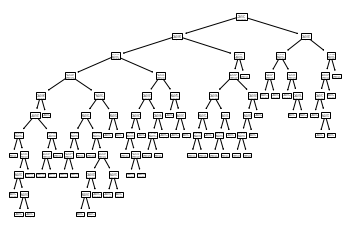

In [92]:
from sklearn import tree
tree.plot_tree(dt_model);